<a href="https://colab.research.google.com/github/MeNoodie/College_placement_prediction_model/blob/main/College_placement_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🎓📊 College Placements Predictor – AI Model 🚀📈

#### 📚Required Libraries

In [1]:
import pandas as pd
import requests

In [34]:
New_data = pd.read_csv("/content/filtered_output.csv")

#####  🔍i already perform Eda and extract required columns for my project and convert into csv, i used methods for EDA such as - column extraction using pd.DataFrame , columns name changing using New_data.shape , , isnull() , data.duplicated() , info() , rename() and etc etc.

In [35]:
New_data.head() # we use this method to see our data

,Unnamed: 0,Stream,Cgpa,Internships,Project,Placement
0,0,Mechanical Engineering,7.37,No,No,Not Placed
1,1,Electronics and Communication Engineering,9.35,No,Yes,Not Placed
2,2,Information Technology,7.84,No,Yes,Placed
3,3,Computer Science in AIML,7.87,Yes,Yes,Not Placed
4,4,Computer Science and Engineering,9.26,Yes,Yes,Not Placed


In [36]:
 New_data = New_data.iloc[:,1:] # we remove unnamed:0 from out dataset
 New_data.head()

,Stream,Cgpa,Internships,Project,Placement
0,Mechanical Engineering,7.37,No,No,Not Placed
1,Electronics and Communication Engineering,9.35,No,Yes,Not Placed
2,Information Technology,7.84,No,Yes,Placed
3,Computer Science in AIML,7.87,Yes,Yes,Not Placed
4,Computer Science and Engineering,9.26,Yes,Yes,Not Placed


#### 📝 Now we change categorical values of columns in numerical so we can train our model

In [37]:
New_data["Placement"] = New_data["Placement"].map({"Placed": 1, "NotPlaced": 0}).fillna(-1)
New_data["Internships"] = New_data["Internships"].map({"Yes": 1, "No": 0}).fillna(-1)
New_data["Project"] = New_data["Project"].map({"Yes": 1, "No": 0}).fillna(-1)


In [38]:
New_data.head()

,Stream,Cgpa,Internships,Project,Placement
0,Mechanical Engineering,7.37,0,0.0,-1.0
1,Electronics and Communication Engineering,9.35,0,1.0,-1.0
2,Information Technology,7.84,0,1.0,1.0
3,Computer Science in AIML,7.87,1,1.0,-1.0
4,Computer Science and Engineering,9.26,1,1.0,-1.0


In [39]:
New_data["Stream"].value_counts() # using these we can see our column data value count that how many uniques data we have and thier counts

,count
Stream,
Computer Science and Engineering,81
Electronics and Communication Engineering,62
Information Technology,41
Electrical Engineering,37
Mechanical Engineering,32
Civil Engineering,27
Electrical and Electronics Engineering,27
Computer Science in Data Science,23
Computer Science and Design,23


#### Here i found that there many uniques values so i have to use column tranformation to convert it for training but i don't want to use columns transformation so i though why not give them number so our model identify easily.

In [40]:
stream_id_map = {
    "Computer Science and Engineering": 1,
    "Electronics and Communication Engineering": 2,
    "Information Technology": 3,
    "Electrical Engineering": 4,
    "Mechanical Engineering": 5,
    "Civil Engineering": 6,
    "Electrical and Electronics Engineering": 7,
    "Computer Science in Data Science": 8,
    "Computer Science and Design": 9,
    "Computer Science in AIML": 10
}

New_data["Stream_ID"] = New_data["Stream"].map(stream_id_map)

In [41]:
New_data.head()

,Stream,Cgpa,Internships,Project,Placement,Stream_ID
0,Mechanical Engineering,7.37,0,0.0,-1.0,5.0
1,Electronics and Communication Engineering,9.35,0,1.0,-1.0,2.0
2,Information Technology,7.84,0,1.0,1.0,3.0
3,Computer Science in AIML,7.87,1,1.0,-1.0,10.0
4,Computer Science and Engineering,9.26,1,1.0,-1.0,1.0


In [44]:
 New_data = New_data.iloc[:,1:] # here we agin remove stream column because we create stream_Id which will go for training
 New_data.head()


,Cgpa,Internships,Project,Placement,Stream_ID
0,7.37,0,0.0,-1.0,5.0
1,9.35,0,1.0,-1.0,2.0
2,7.84,0,1.0,1.0,3.0
3,7.87,1,1.0,-1.0,10.0
4,9.26,1,1.0,-1.0,1.0


In [45]:
# Move column to a specific position
column_to_move = "Stream_ID"
desired_position = 0  # index starts from 0

# Reorder columns
cols = list(New_data.columns)
cols.insert(desired_position, cols.pop(cols.index(column_to_move)))
New_data = New_data[cols]


In [46]:
New_data["Stream_ID"].fillna(0, inplace=True)
New_data.sample(10)

/tmp/ipython-input-4213526727.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  New_data["Stream_ID"].fillna(0, inplace=True)


,Stream_ID,Cgpa,Internships,Project,Placement
31,1.0,7.80,1,1.0,-1.0
369,4.0,7.24,0,1.0,1.0
141,4.0,9.48,0,1.0,1.0
206,9.0,9.21,1,0.0,-1.0
199,1.0,8.82,1,0.0,-1.0
307,5.0,8.43,0,1.0,-1.0
57,9.0,8.58,1,1.0,1.0
388,9.0,8.30,1,-1.0,1.0
380,1.0,6.50,1,1.0,-1.0
316,2.0,7.07,1,1.0,-1.0


In [47]:
New_data["Internships"] = New_data["Internships"].astype(float)  # we convert it to float so our model training will go smooth

## 📊 We use Matplotib and Seaborn for Data visualization

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

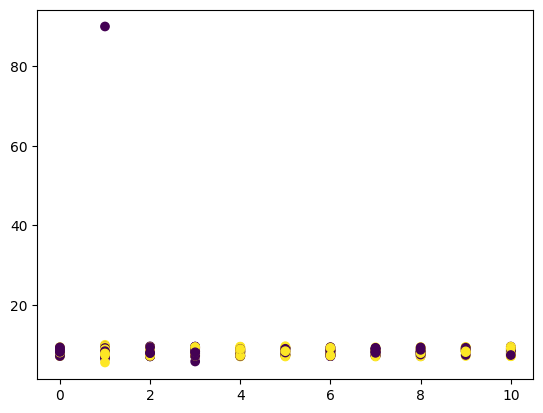

In [49]:
plt.scatter(New_data["Stream_ID"] ,New_data["Cgpa"], c  = New_data["Placement"])

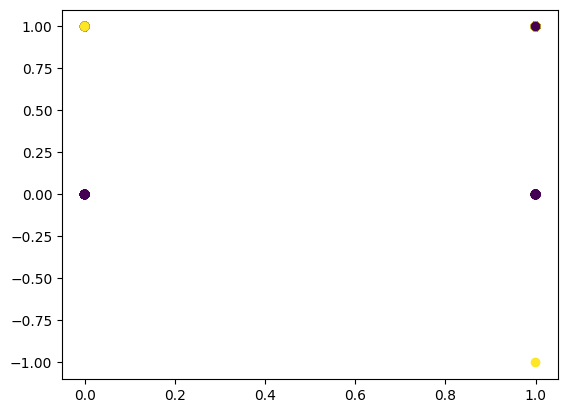

In [50]:
plt.scatter(New_data["Internships"],New_data["Project"] , c  = New_data["Placement"])

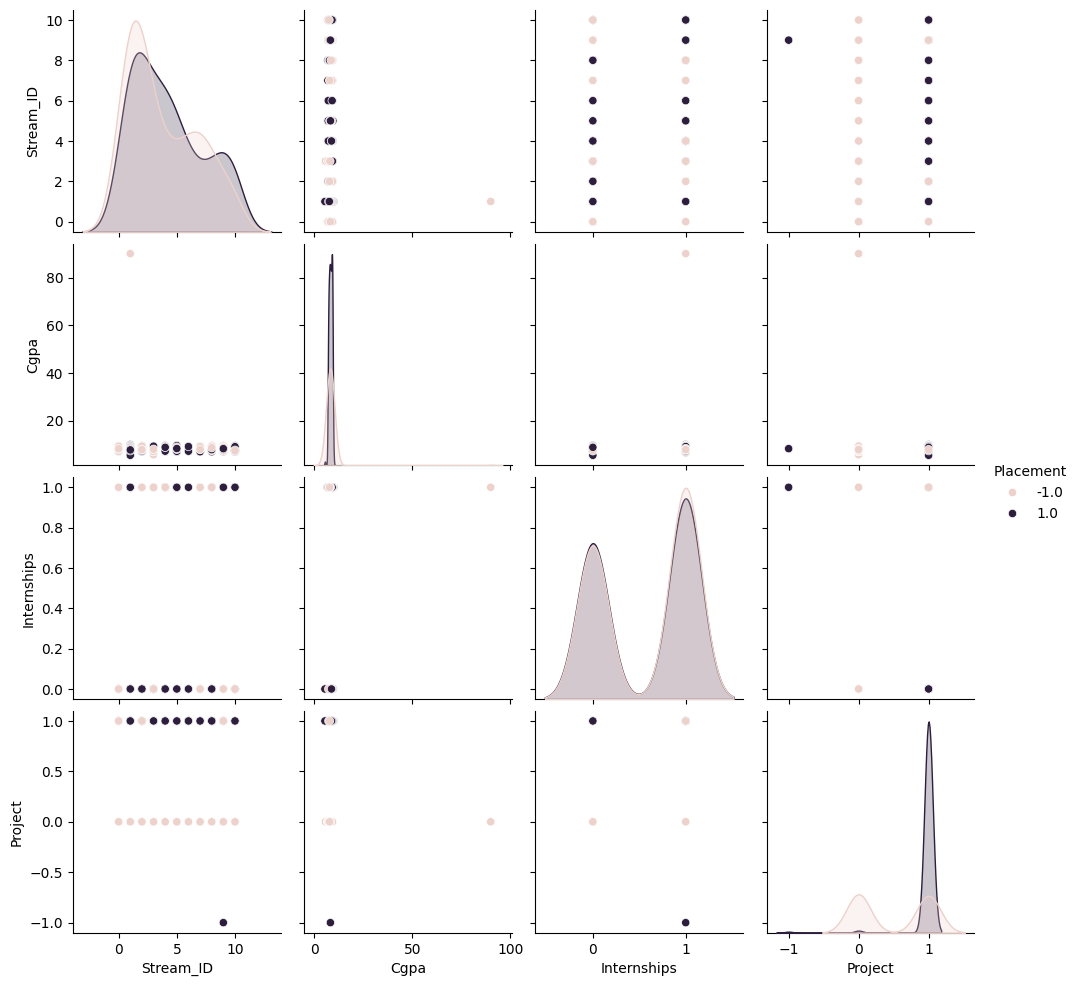

In [51]:
sns.pairplot(New_data,  hue = "Placement") # with seaborn we can see each plot

###  🛠️ Here we divide our data in x and y

In [52]:
x = New_data.iloc[: , 0:4]
y = New_data.iloc[: , -1]

In [53]:
New_data.head(1)

,Stream_ID,Cgpa,Internships,Project,Placement
0,5.0,7.37,0.0,0.0,-1.0


In [54]:
# x.head(1)
x.shape

(401, 4)

In [55]:
#y.head()
y.shape

(401,)

## 🧠TRAIN TEST SPLIT


we use sicklit for performing train_test_spilit

In [56]:
!pip install -U scikit-learn
from sklearn.model_selection import train_test_split

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 62.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sklearn-compat 0.1.3 requires scikit-learn<1.7,>=1.2, but you have scikit-learn 1.7.1 which is incompatible.


In [57]:
train_test_split(x,y,test_size = 0.1) # here we perform split and use 10% data of whole for testing

[     Stream_ID  Cgpa  Internships  Project
 245        8.0  8.27          1.0      0.0
 24         6.0  7.79          0.0      1.0
 152        8.0  8.55          0.0      1.0
 181        0.0  7.96          1.0      1.0
 32         8.0  9.26          1.0      1.0
 ..         ...   ...          ...      ...
 372        3.0  8.93          1.0      1.0
 215        4.0  8.23          0.0      1.0
 40         1.0  7.95          1.0      1.0
 111        3.0  7.25          0.0      0.0
 162        5.0  7.52          0.0      1.0
 
 [360 rows x 4 columns],
      Stream_ID  Cgpa  Internships  Project
 133        6.0  8.58          0.0      1.0
 187        2.0  8.41          1.0      1.0
 124        4.0  8.59          0.0      1.0
 272        1.0  9.39          0.0      1.0
 45         5.0  8.52          0.0      0.0
 211        5.0  7.46          0.0      1.0
 82         0.0  9.02          0.0      1.0
 0          5.0  7.37          0.0      0.0
 56         5.0  9.35          0.0      1.0
 319 

## Above data we store in variable.

In [58]:
X_train , X_test , y_train , y_test = train_test_split(x,y,test_size = 0.1)

In [59]:
X_train

,Stream_ID,Cgpa,Internships,Project
353,7.0,8.22,0.0,0.0
142,4.0,7.99,0.0,1.0
147,9.0,8.88,1.0,1.0
214,5.0,9.16,1.0,0.0
174,4.0,7.90,1.0,1.0
...,...,...,...,...
237,4.0,7.93,0.0,1.0
293,1.0,9.60,1.0,1.0
372,3.0,8.93,1.0,1.0
192,3.0,9.34,0.0,1.0


In [60]:
y_train

,Placement
353,-1.0
142,1.0
147,1.0
214,-1.0
174,1.0
...,...
237,1.0
293,1.0
372,-1.0
192,-1.0


In [61]:
# scale our data
from sklearn.preprocessing import StandardScaler

In [62]:
scaler = StandardScaler()

In [63]:
X_train  = scaler.fit_transform(X_train)

In [64]:
X_train

array([[ 0.99140451, -0.06688796, -1.18321596, -1.68237657],
       [-0.00553857, -0.11953362, -1.18321596,  0.57753226],
       [ 1.65603324,  0.08418219,  0.84515425,  0.57753226],
       ...,
       [-0.33785293,  0.0956269 ,  0.84515425,  0.57753226],
       [-0.33785293,  0.1894735 , -1.18321596,  0.57753226],
       [ 0.65909015, -0.16531245, -1.18321596,  0.57753226]])

In [65]:
X_test = scaler.fit_transform(X_test)

In [66]:
X_test

array([[ 1.61829246, -0.38969389, -0.92932038,  0.75955453],
       [-0.64363905,  0.68473903,  1.07605517, -1.31656118],
       [ 0.48732671, -0.7815459 , -0.92932038,  0.75955453],
       [ 1.99528104,  1.10187181, -0.92932038, -1.31656118],
       [-0.26665046,  1.74653157,  1.07605517,  0.75955453],
       [-0.64363905,  1.54428537,  1.07605517, -1.31656118],
       [-1.02062763,  0.97546794,  1.07605517,  0.75955453],
       [-0.64363905, -0.92059016,  1.07605517,  0.75955453],
       [-0.64363905, -0.80682668,  1.07605517,  0.75955453],
       [ 1.24130387,  0.520414  , -0.92932038,  0.75955453],
       [-0.64363905, -1.07227481,  1.07605517, -1.31656118],
       [ 0.86431529,  0.28024664, -0.92932038,  0.75955453],
       [ 0.48732671, -0.70570358, -0.92932038,  0.75955453],
       [ 1.24130387,  0.71001981, -0.92932038,  0.75955453],
       [-1.02062763,  1.45580266,  1.07605517,  0.75955453],
       [-0.26665046, -2.94305214, -0.92932038, -1.31656118],
       [-0.64363905,  0.

Using Logistic Regression We made our data ( ye aisa line khojega jo classes ko bat dega )

In [67]:
from sklearn.linear_model import LogisticRegression

In [68]:
clf = LogisticRegression()

In [69]:
clf.fit(X_train , y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [75]:
y_pred = clf.predict(X_test)

In [76]:
y_test

,Placement
258,1.0
312,-1.0
211,-1.0
95,-1.0
71,-1.0
94,-1.0
30,1.0
196,1.0
96,1.0
226,1.0


In [77]:
# now we see accuracy
from sklearn.metrics import accuracy_score

In [78]:
accuracy_score(y_test , clf.predict(X_test)) # by this we can see our model accuracy

0.8292682926829268

In [82]:
from mlxtend.plotting import plot_decision_regions
# i can't able to perform decision plot , in future i will add it

<Axes: xlabel='Stream_ID', ylabel='Cgpa'>

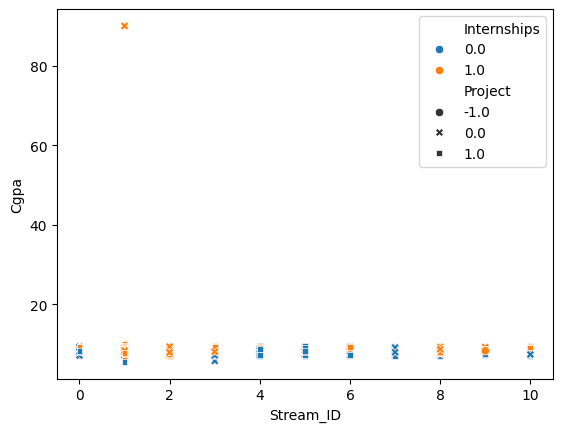

In [81]:
sns.scatterplot(x = New_data["Stream_ID"] , y = New_data["Cgpa"] , hue = New_data["Internships"] , style = New_data["Project"] )

In [93]:
import pickle

In [94]:
pickle.dump(clf,open('placement_model.pkl' , "wb"))